### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import glob
import soundfile
import os
import sys

In [2]:
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils.multiclass import unique_labels

In [4]:
from IPython.display import Audio

In [5]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)

### Loading Dataset

In [6]:
RavdessData = 'C:/Users/sneha/Downloads/archive (1)/audio_speech_actors_01-24/'

In [7]:
ravdesDirectoryList = os.listdir(RavdessData)
fileEmotion = []
filePath = []

for dir in ravdesDirectoryList:
    actor = os.listdir(RavdessData + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        fileEmotion.append(int(part[2]))
        filePath.append(RavdessData + dir + '/' + file)
emotion_df = pd.DataFrame(fileEmotion, columns=['Emotions'])
path_df = pd.DataFrame(filePath, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
Ravdess_df

,Emotions,Path
0,1,C:/Users/sneha/Downloads/archive (1)/audio_spe...
1,1,C:/Users/sneha/Downloads/archive (1)/audio_spe...
2,1,C:/Users/sneha/Downloads/archive (1)/audio_spe...
3,1,C:/Users/sneha/Downloads/archive (1)/audio_spe...
4,2,C:/Users/sneha/Downloads/archive (1)/audio_spe...
...,...,...
1435,8,C:/Users/sneha/Downloads/archive (1)/audio_spe...
1436,8,C:/Users/sneha/Downloads/archive (1)/audio_spe...
1437,8,C:/Users/sneha/Downloads/archive (1)/audio_spe...
1438,8,C:/Users/sneha/Downloads/archive (1)/audio_spe...


In [8]:
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:/Users/sneha/Downloads/archive (1)/audio_spe...
1,neutral,C:/Users/sneha/Downloads/archive (1)/audio_spe...
2,neutral,C:/Users/sneha/Downloads/archive (1)/audio_spe...
3,neutral,C:/Users/sneha/Downloads/archive (1)/audio_spe...
4,calm,C:/Users/sneha/Downloads/archive (1)/audio_spe...


In [9]:
dataPath = pd.concat([Ravdess_df], axis=0)
dataPath.to_csv('data_path.csv', index=False)
dataPath.head()

,Emotions,Path
0,neutral,C:/Users/sneha/Downloads/archive (1)/audio_spe...
1,neutral,C:/Users/sneha/Downloads/archive (1)/audio_spe...
2,neutral,C:/Users/sneha/Downloads/archive (1)/audio_spe...
3,neutral,C:/Users/sneha/Downloads/archive (1)/audio_spe...
4,calm,C:/Users/sneha/Downloads/archive (1)/audio_spe...


### Analysis of Emotions

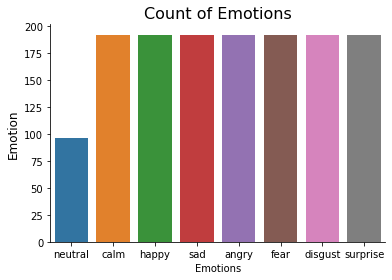

In [10]:
plt.title('Count of Emotions', size=16)
sns.countplot(dataPath.Emotions)
plt.ylabel('Count', size=12)
plt.ylabel('Emotion', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [11]:
def createWaveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [12]:
def createSpectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emption'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

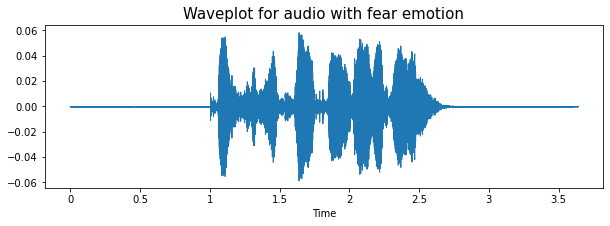

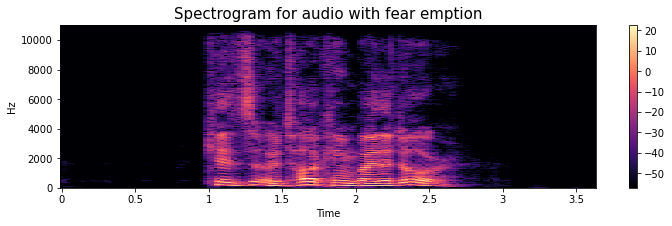

In [13]:
emotion='fear'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

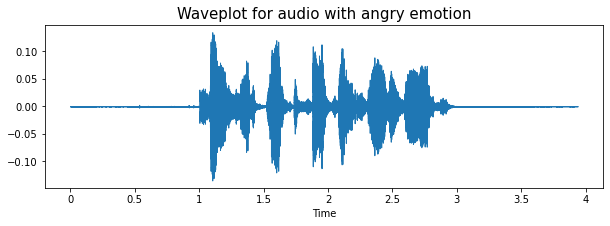

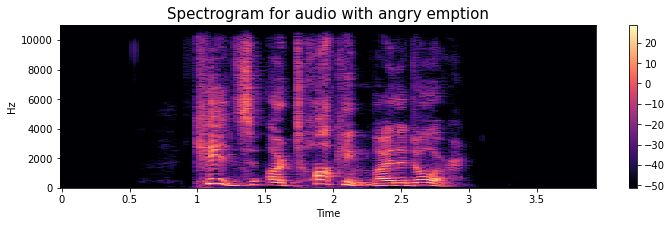

In [14]:
emotion='angry'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

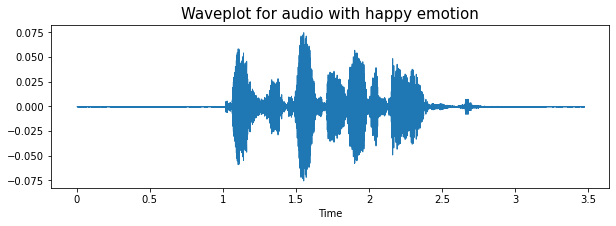

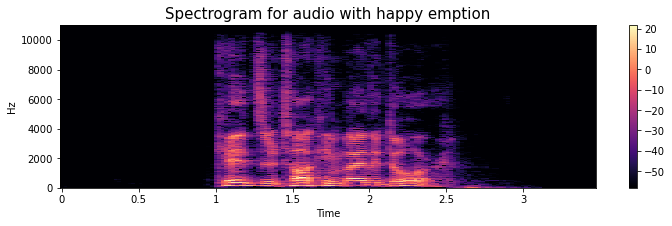

In [15]:
emotion='happy'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

In [16]:
def noise(data):
    noiseAmp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noiseAmp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shiftRange = int(np.random.uniform(low =-5, high = 5)*1000)
    return np.roll(data, shiftRange)

def pitch(data, samplingRate, pitchFactor=0.7):
    return librosa.effects.pitch_shift(data, samplingRate, pitchFactor)

In [17]:
path = np.array(dataPath.Path)[1]
data, sampleRate = librosa.load(path)

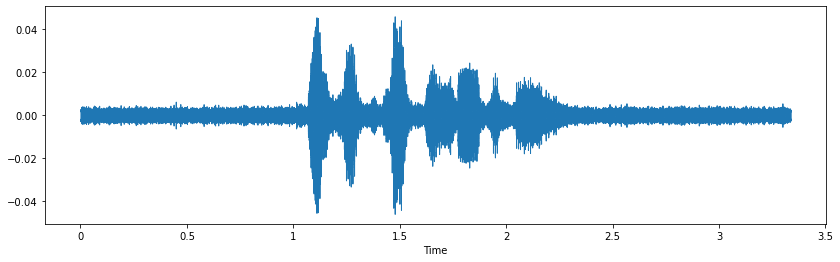

In [18]:
x=noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

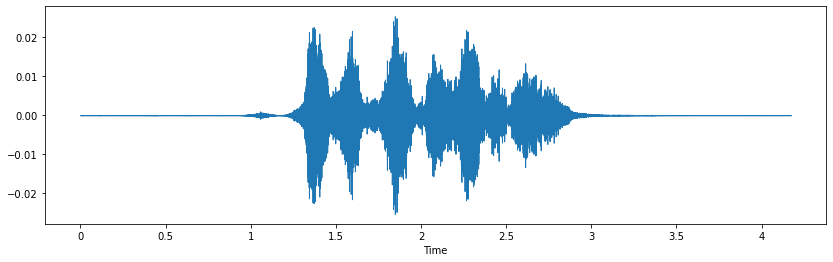

In [19]:
x=stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

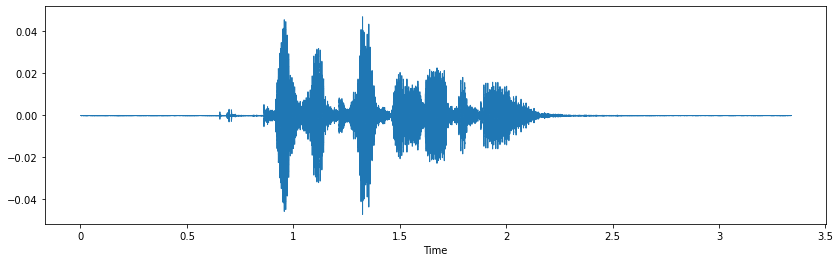

In [20]:
x=shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

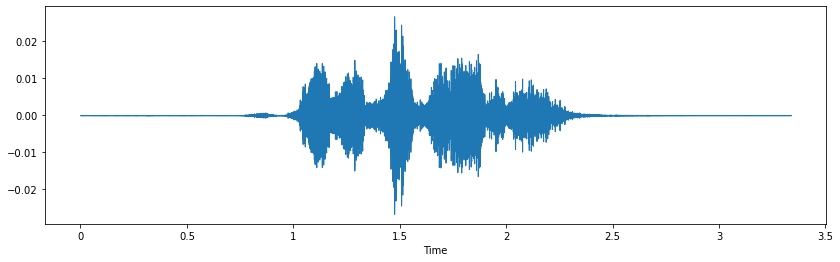

In [21]:
x=pitch(data, sampleRate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

### Feature Extraction

In [22]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result = np.hstack((result, mel))      
    return result

In [23]:
emotions={
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}
observed_emotions=['neutral','calm','happy','sad','angry','fearful', 'disgust','surprised']

In [24]:
def loadData(test_size=0.1):
    x,y=[],[]
    for file in glob.glob('C:/Users/sneha/Downloads/archive (1)/audio_speech_actors_01-24/Actor_*/*.wav'):
        fileName=os.path.basename(file)
        emotion1=emotions[fileName.split("-")[2]]
        if emotion1 not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion1)
    return train_test_split(np.array(x), y, test_size=test_size,train_size= 0.9, random_state=9)

### Splitting datasets

In [25]:
xTrain, xTest, yTrain, yTest=loadData(test_size=0.1)

In [26]:
xTrain

array([[-5.77303772e+02,  5.58171349e+01, -1.49853468e+01, ...,
         1.60067393e-05,  1.14085731e-06,  3.74033320e-08],
       [-6.28635010e+02,  7.03374023e+01, -7.74889886e-01, ...,
         2.63211763e-08,  3.52432217e-09,  1.28365624e-10],
       [-5.44289246e+02,  6.67546158e+01, -1.47213469e+01, ...,
         1.78927939e-06,  2.31863027e-07,  8.07332157e-09],
       ...,
       [-6.12351135e+02,  5.83173866e+01,  7.11927795e+00, ...,
         1.56113820e-05,  8.36138781e-07,  1.61279790e-08],
       [-5.60938599e+02,  3.29989243e+01, -2.35014458e+01, ...,
         1.04736910e-06,  9.07152966e-08,  3.24562532e-09],
       [-7.10200439e+02,  8.06265793e+01,  5.56867313e+00, ...,
         2.05180598e-07,  2.26379644e-08,  7.75339848e-10]])

In [27]:
print(f'Number of training data: {xTrain.shape[0]}')
print(f'Number of testing data: {xTest.shape[0]}')
print(f'Number of features extracted: {xTrain.shape[1]}')

Number of training data: 1296
Number of testing data: 144
Number of features extracted: 180


In [28]:
# Scale data
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

### Define and train Model

In [29]:
mlp_model = MLPClassifier(activation='relu',
                         solver='sgd',
                         hidden_layer_sizes=100,
                         alpha=0.839903176695813,
                         batch_size=150,
                         learning_rate='adaptive',
                         max_iter=100000)
mlp_model.fit(xTrain,yTrain)

MLPClassifier(alpha=0.839903176695813, batch_size=150, hidden_layer_sizes=100,
              learning_rate='adaptive', max_iter=100000, solver='sgd')

In [30]:
y_pred = mlp_model.predict(xTest)

### Evaluating model

In [31]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14, model='clf'):
    """
    Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix,
    as a seaborn heatmap. 
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, ax=ax, fmt="d", cmap=plt.cm.Oranges)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t) 
    plt.show()

In [32]:
xTest

array([[ 0.16179895,  0.83419378, -0.10790466, ..., -0.35910413,
        -0.35791257, -0.36230854],
       [ 0.77724715, -2.05007403, -2.74840178, ..., -0.21992106,
        -0.22784999, -0.20146479],
       [ 0.09239866, -0.49698204,  0.12831758, ..., -0.07344405,
        -0.0495117 , -0.24480547],
       ...,
       [ 0.28924307,  0.26056814,  0.13386282, ..., -0.30980406,
        -0.30313483, -0.31167354],
       [ 2.17888436, -1.62686974, -3.00998312, ...,  1.3629998 ,
         1.254643  ,  1.38668259],
       [ 0.3433022 , -0.40855394, -0.00490185, ..., -0.32872999,
        -0.32415381, -0.32859714]])

In [33]:
def get_model_performance(model):
    y_pred = model.predict(xTest)
    accuracy=accuracy_score(y_true=yTest, y_pred=y_pred)
    # Print the accuracy
    print("\nModel:{}    Accuracy: {:.2f}%".
          format(type(model).__name__ , accuracy*100))
    
    # Print Confusion Matrix
    print_confusion_matrix(confusion_matrix(yTest, y_pred), unique_labels(yTest, y_pred), model=model)


Model:MLPClassifier    Accuracy: 65.97%


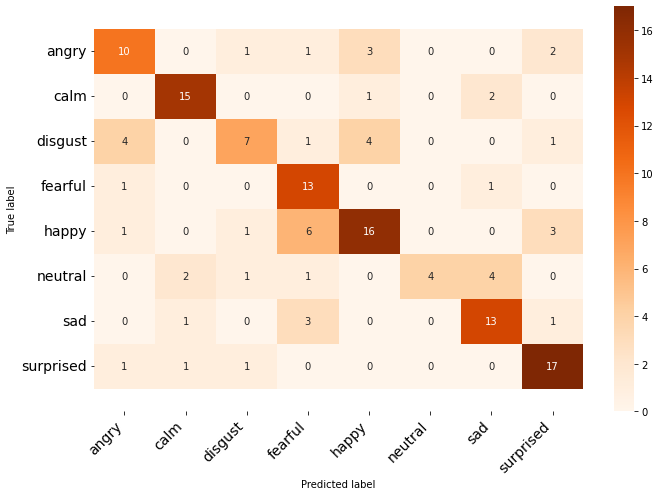

In [34]:
get_model_performance(mlp_model)

### Saving the model

In [35]:
import pickle
pickle.dump(mlp_model,open('mlp_model.pkl','wb'))